<a href="https://colab.research.google.com/github/Nischhal9205/Python-and-ML-for-OIL-and-GAS-Industry/blob/main/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from math import radians, cos, sin, asin, sqrt

Phase 1: Data Collection and Exploratory Data Analysis (EDA)

Step 1 - Data Import and Preprocessing


1. Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


2. Handle Missing Values

In [ ]:
df.isnull()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna(inplace=True)

3. Data Transformation

In [ ]:
categorical_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Vehicle_Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
scaler = StandardScaler()
num_cols = ['Distance', 'Delivery_Time', 'Order_Cost']
df[num_cols] = scaler.fit_transform(df[num_cols])

Step 2 - Exploratory Data Analysis (EDA)

1. Descriptive Statistics

In [ ]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,-1.643130e-16,5.250000,3.738500,3.686500,3.730349e-16,-2.042810e-16,46.616650
std,1.002509e+00,2.745027,0.703021,0.697063,1.002509e+00,1.002509e+00,29.361706
min,-1.608593e+00,1.000000,2.500000,2.600000,-1.857269e+00,-1.688954e+00,1.240000
25%,-7.924313e-01,3.000000,3.200000,3.100000,-7.896704e-01,-9.013569e-01,21.602500
50%,-1.806765e-01,5.000000,3.800000,3.700000,7.662482e-02,-1.925947e-02,47.530000
75%,7.325599e-01,8.000000,4.300000,4.300000,8.789834e-01,9.076026e-01,70.245000
max,1.963762e+00,10.000000,5.000000,5.000000,1.652608e+00,1.737826e+00,99.740000


2. Correlation Analysis

In [ ]:
df.corr(numeric_only=True)

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bike,Vehicle_Type_Car
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466,-0.070825,0.082485,-0.038408,-0.105983,-0.006507,-0.057526,-0.090784
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218,-0.033373,0.106891,-0.013447,0.017669,0.053967,-0.035532,0.021715
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759,0.017461,0.020902,-0.076586,0.025876,-0.009302,-0.129838,0.148198
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884,-0.048275,-0.034550,0.063798,0.040921,-0.052857,-0.004062,0.079871
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154,0.054402,-0.024621,-0.020492,0.039714,0.011810,-0.091859,-0.001372
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462,-0.080923,0.123021,0.002218,0.013153,0.027931,0.056296,-0.002373
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000,0.023111,-0.065083,-0.033488,-0.217727,0.195050,0.079436,-0.077498
Weather_Conditions_Rainy,-0.070825,-0.033373,0.017461,-0.048275,0.054402,-0.080923,0.023111,1.000000,-0.354787,-0.379096,0.043209,-0.149178,-0.062096,0.055801
Weather_Conditions_Snowy,0.082485,0.106891,0.020902,-0.034550,-0.024621,0.123021,-0.065083,-0.354787,1.000000,-0.337426,-0.034343,0.090948,0.109348,-0.072903
Weather_Conditions_Sunny,-0.038408,-0.013447,-0.076586,0.063798,-0.020492,0.002218,-0.033488,-0.379096,-0.337426,1.000000,-0.010732,0.071270,-0.125956,0.111947


3. Outlier Detection

<Axes: >

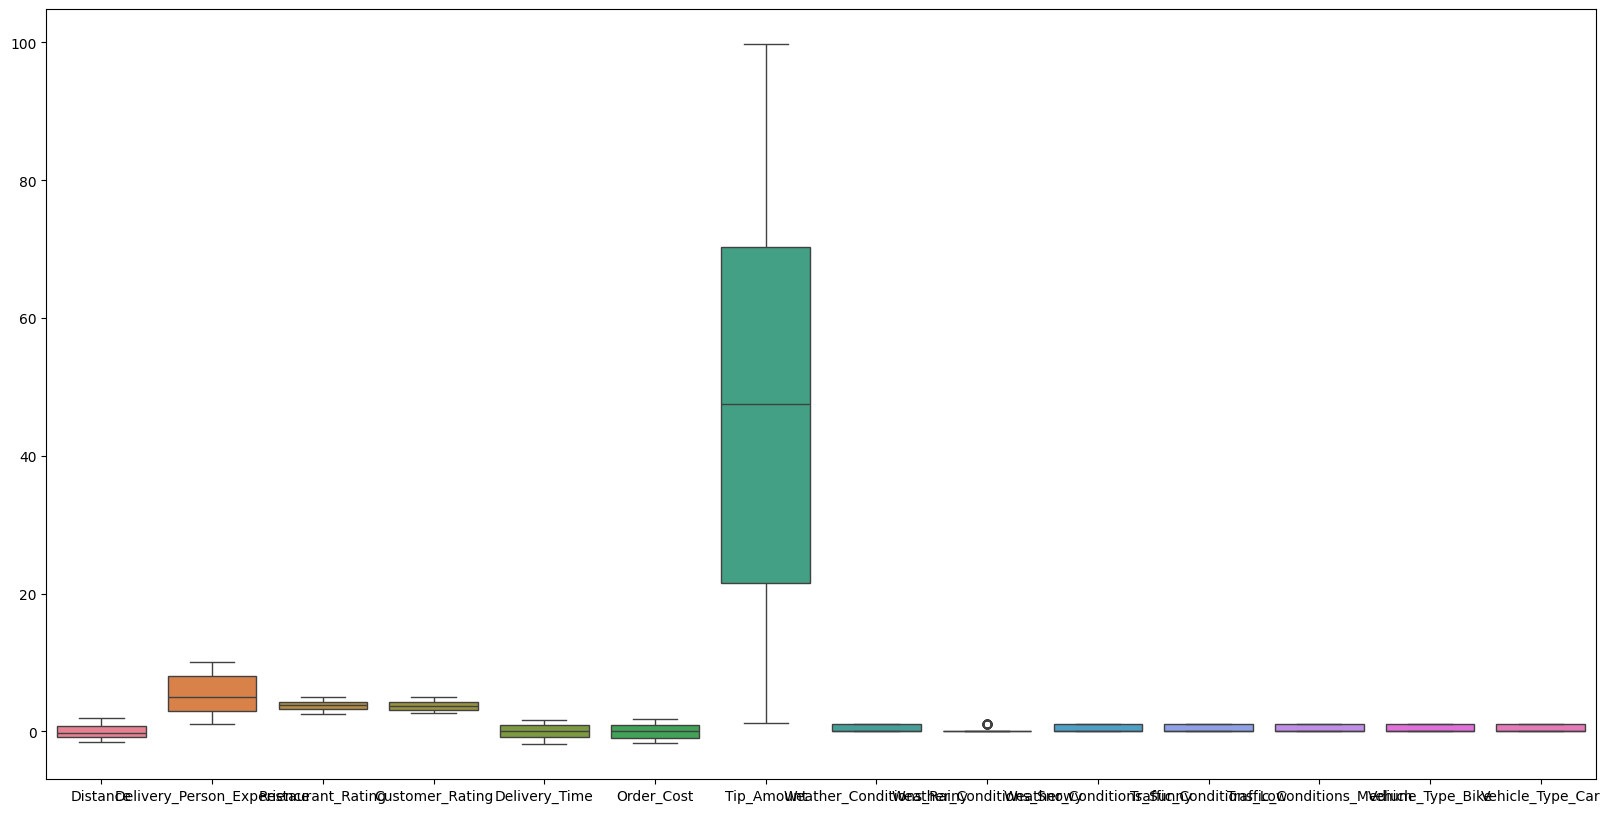

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

Step 3 - Feature Engineering

1. Time-Based Features

In [ ]:
df['Rush_Hour'] = df['Order_Time'].apply(lambda x: 1 if '17:00' <= x <= '20:00' else 0)

Phase 2: Predictive Modeling

Step 4 - Linear Regression Model


1. Train Test Split

In [ ]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost',
       'Tip_Amount', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny', 'Traffic_Conditions_Low',
       'Traffic_Conditions_Medium', 'Vehicle_Type_Bike', 'Vehicle_Type_Car',
       'Rush_Hour'],
      dtype='object')

In [ ]:
df['Traffic_Conditions_Medium'].head()

,Traffic_Conditions_Medium
0,True
1,True
2,True
3,False
4,False


In [ ]:
# Define the mapping
priority_map = {'High': 2, 'Medium': 1, 'Low': 0}

# Apply mapping to the columns
df['Order_Priority'] = df['Order_Priority'].map(priority_map)

In [ ]:
def map_traffic(row):
    if row['Traffic_Conditions_Medium'] == 1:
        return 1
    elif row['Traffic_Conditions_Low'] == 1:
        return 0
    else:
        return 2  # Assuming High is the remaining case

df['Traffic_Conditions_Ordinal'] = df.apply(map_traffic, axis=1)

In [ ]:
x = df[['Distance', 'Traffic_Conditions_Medium', 'Traffic_Conditions_Low', 'Order_Priority']]
y = df['Delivery_Time']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

2. Model Building

In [ ]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)

3. Evaluation Metrics

In [ ]:
print("Linear Regression Results:", y_pred)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Results: [ 0.01428579 -0.17092455 -0.02579662  0.04589152  0.08919558 -0.06237567
 -0.06614122  0.06950694 -0.02374647  0.11247242 -0.00640419 -0.04186304
  0.11754897  0.09650363 -0.18966874 -0.10131725 -0.1191064   0.09148284
 -0.02482036  0.07608974 -0.15137873  0.02128978  0.13014272 -0.03397657
 -0.1173279  -0.127481    0.0200625  -0.10276101  0.06902887 -0.02618712
  0.07267284  0.11301631 -0.00398417  0.0584295  -0.11100345  0.01181
 -0.04259946  0.07732708  0.01636662  0.063496  ]
MAE: 0.8848448283451986
MSE: 1.0920281754705183
R² Score: -0.002831095612682022


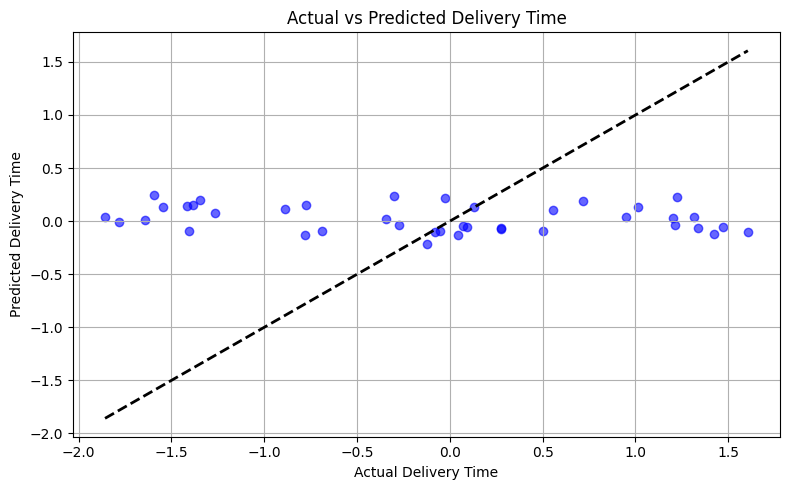

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time')
plt.grid(True)
plt.tight_layout()
plt.show()

Step 5 - Logistic Regression Model (for Categorization)

1. Model Building

In [ ]:
df['Status'] = (df['Delivery_Time'] > df['Delivery_Time'].median()).astype(int)
y_class = df['Status']
X_class = df[['Traffic_Conditions_Medium', 'Traffic_Conditions_Low', 'Weather_Conditions_Rainy', 'Weather_Conditions_Snowy',
       'Weather_Conditions_Sunny']]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)
y_pred_c = log_model.predict(X_test_c)

2. Evaluation Metrics

In [ ]:
print("Logistic Regression Results:", y_pred_c)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall:", recall_score(y_test_c, y_pred_c))
print("F1 Score:", f1_score(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

Logistic Regression Results: [1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 1 1]
Accuracy: 0.475
Precision: 0.5
Recall: 0.42857142857142855
F1 Score: 0.46153846153846156
Confusion Matrix:
 [[10  9]
 [12  9]]


<Figure size 600x400 with 0 Axes>

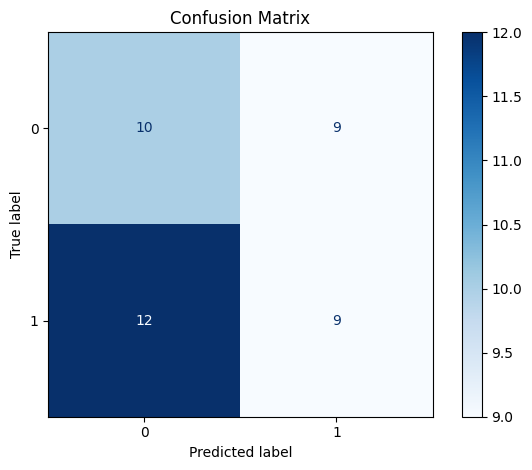

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# 🔲 1. Confusion Matrix Plot
plt.figure(figsize=(6, 4))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_c, y_pred_c)).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.grid(False)
plt.tight_layout()
plt.show()

/tmp/ipython-input-23-2486953802.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


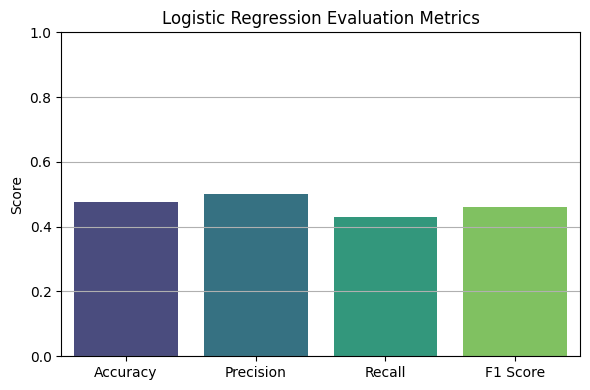

In [ ]:
# 📈 2. Classification Metrics Bar Plot
metrics = {
    'Accuracy': accuracy_score(y_test_c, y_pred_c),
    'Precision': precision_score(y_test_c, y_pred_c),
    'Recall': recall_score(y_test_c, y_pred_c),
    'F1 Score': f1_score(y_test_c, y_pred_c)
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Logistic Regression Evaluation Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
